# preprocess data

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [13]:
df = pd.read_csv("data/drawndata1.csv")
df.head() 

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


In [14]:
max_x = df['x'].max() # not important
max_y = df['y'].max()

max_x, max_y

(2880.070415872307, 513.9865008590583)

In [15]:
X = df[['x', 'y']].values
y = df['z'] == "a"

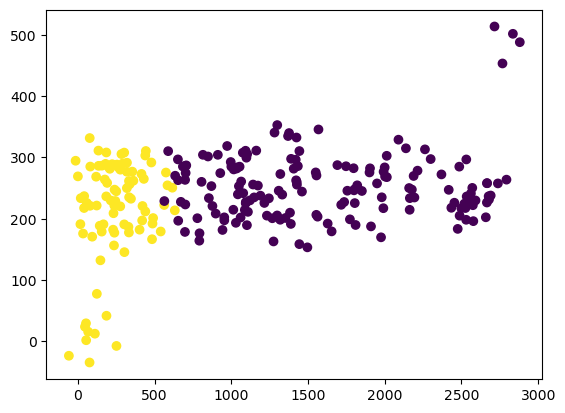

In [16]:
plt.scatter(X[:,0], X[:, 1], c=y) #two X for the 2-dimensional array, c= is the color which is based on the y value

# scaling data

choose the right scaling which is appropriate to the data (e.g. StandardScaler, QuantileTransformer)

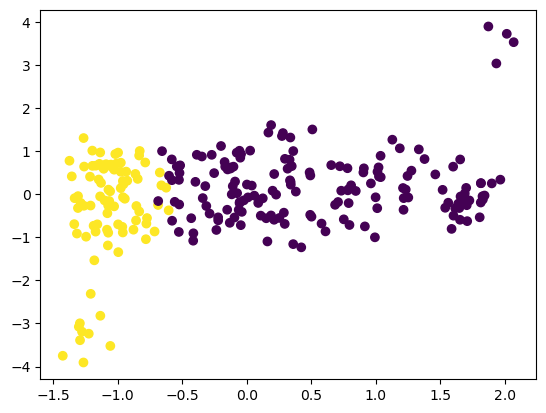

In [17]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:,0], X_new[:, 1], c=y)

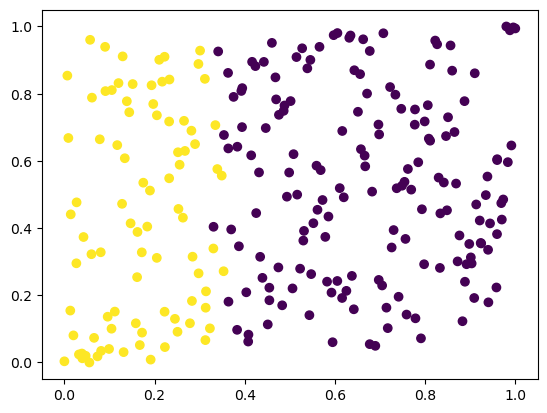

In [18]:
X_new1 = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new1[:,0], X_new1[:, 1], c=y)

# predict

in this case, QuantileTransformer performs way better then StandardScaler

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline


def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)),
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")


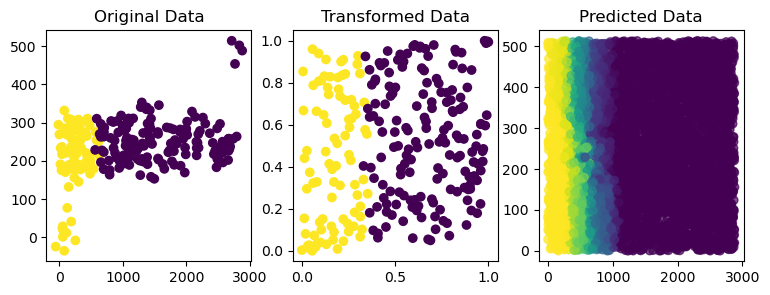

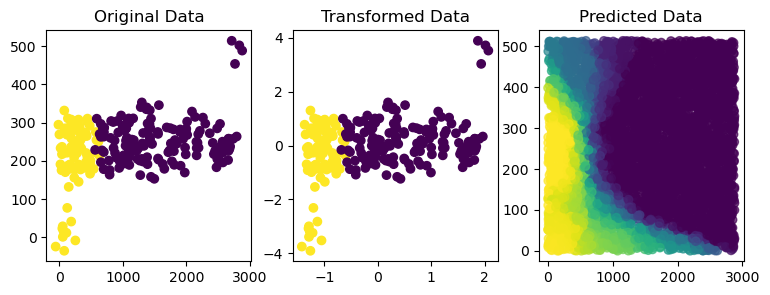

In [20]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))
plot_output(scaler=StandardScaler())

# poly

for classification task which is not linearly separable

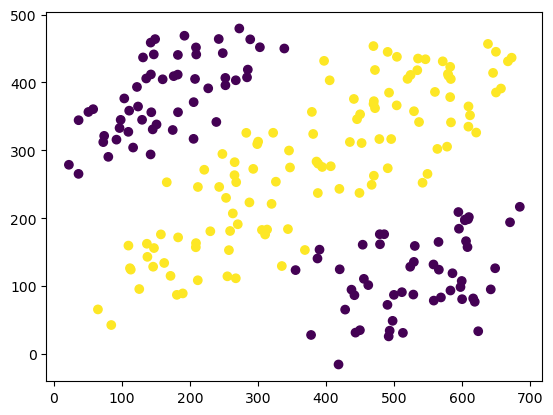

In [22]:
poly_df = pd.read_csv("data/drawndata2.csv")
X_poly = poly_df[['x', 'y']].values
y_poly = poly_df['z'] == 'a'
plt.scatter(X_poly[:,0], X_poly[:, 1], c=y_poly)

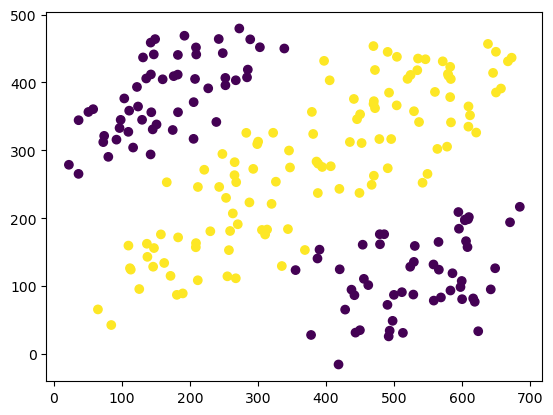

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred_poly = pipe.fit(X_poly, y_poly).predict(X_poly)
plt.scatter(X_poly[:, 0], X_poly[:, 1], c=pred_poly)


# one hot encoding

for not numerical data

In [ ]:
arr = np.array(["low", "low", "high","medium"]).reshape(-1,1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, handle_unknown='ignore') #sparse=False = see whats inside matrix
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
enc.transform([["zero"]]) # we can do this, because we set handle_unknown='ignore' (usefull if generating X matrix, not when generating y label)

array([[0., 0., 0.]])